In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

In [2]:
def keep_subset(cmap1, thresh=0.1, k0=None, k1=None):
    """
    extract the subset based on contact probability or on axis subsetting
    """
    ## if no axis subsets are provided, subset based on probability
    if k0 is None and k1 is None:
        k0 = np.where(cmap1.sum(axis=0)>thresh)[0]
        k1 = np.where(cmap1.sum(axis=1)>thresh)[0]
    cmap2 = cmap1[:,k0][k1,:]
    return cmap2,k0,k1

In [51]:
def gaps(seq):
    return -seq[:-1]+seq[1:]-1

def fill_in_axis(k0, gap_threshold=5,verbose=False):
    """
    fill in gaps smaller than threshold
    """
    
    gaps0 = gaps(k0)
    break_pts = np.where((gaps0 > 0) & (gaps0 < gap_threshold))[0]
    fillers = [range(k0[bp]+1,k0[bp]+1+gaps0[bp]) for bp in break_pts]
    new_k0 = np.sort(np.append(k0,np.concatenate(fillers)))
    if verbose:
        print("axis has %d residues before filling"%len(k0))
        print("axis has %d residues after filling"%len(new_k0))
    return new_k0

In [52]:
def get_segments0(new_k0):
    """
    for a given axis returns the continous segments, 
    the break points, 
    and the secondary structure
    """
    gaps1 = gaps(new_k0)
    break_pts = np.where(gaps1 > 0)[0]
    break_pts_ext = [0-1]+list(break_pts)+[len(new_k0)-1]
    
    segments=[]
    endpoints=[]
    for i,bs in enumerate(break_pts_ext[:-1]):
        segments.append(new_k0[range(bs+1,break_pts_ext[i+1]+1)])
        endpoints.append([bs+1,break_pts_ext[i+1]])
    return segments,break_pts,endpoints

In [142]:
hcode={'TM1':[0,31], 'IC1':[32,36], 
       'TM2':[37,66], 'EC1':[67,72], 
       'TM3':[73,106], 'IC2':[107,115],
       'TM4':[116,140], 'EC2':[141,159],
       'TM5':[160,197], 'IC3':[198,203],
       'TM6':[204,241], 'EC3':[242,246],
       'TM7':[247,275], 'H8':[276,288]}

domain_breaks = [v[1] for k,v in hcode.iteritems()]


bw=[['MET','M',   1,  65,'1.29'],
['VAL','V',   2,  66,'1.30'],
['THR','T',   3,  67,'1.31'],
['ALA','A',   4,  68,'1.32'],
['ILE','I',   5,  69,'1.33'],
['THR','T',   6,  70,'1.34'],
['ILE','I',   7,  71,'1.35'],
['MET','M',   8,  72,'1.36'],
['ALA','A',   9,  73,'1.37'],
['LEU','L',  10,  74,'1.38'],
['TYR','Y',  11,  75,'1.39'],
['SER','S',  12,  76,'1.40'],
['ILE','I',  13,  77,'1.41'],
['VAL','V',  14,  78,'1.42'],
['CYS','C',  15,  79,'1.43'],
['VAL','V',  16,  80,'1.44'],
['VAL','V',  17,  81,'1.45'],
['GLY','G',  18,  82,'1.46'],
['LEU','L',  19,  83,'1.47'],
['PHE','F',  20,  84,'1.48'],
['GLY','G',  21,  85,'1.49'],
['ASN','N',  22,  86,'1.50'],
['PHE','F',  23,  87,'1.51'],
['LEU','L',  24,  88,'1.52'],
['VAL','V',  25,  89,'1.53'],
['MET','M',  26,  90,'1.54'],
['TYR','Y',  27,  91,'1.55'],
['VAL','V',  28,  92,'1.56'],
['ILE','I',  29,  93,'1.57'],
['VAL','V',  30,  94,'1.58'],
['ARG','R',  31,  95,'IL1'],
['TYR','Y',  32,  96,'IL1'],
['THR','T',  33,  97,'IL1'],
['LYS','K',  34,  98,'IL1'],
['MET','M',  35,  99,'IL1'],
['LYS','K',  36, 100,'IL1'],
['THR','T',  37, 101,'2.37'],
['ALA','A',  38, 102,'2.38'],
['THR','T',  39, 103,'2.39'],
['ASN','N',  40, 104,'2.40'],
['ILE','I',  41, 105,'2.41'],
['TYR','Y',  42, 106,'2.42'],
['ILE','I',  43, 107,'2.43'],
['PHE','F',  44, 108,'2.44'],
['ASN','N',  45, 109,'2.45'],
['LEU','L',  46, 110,'2.46'],
['ALA','A',  47, 111,'2.47'],
['LEU','L',  48, 112,'2.48'],
['ALA','A',  49, 113,'2.49'],
['ASP','D',  50, 114,'2.50'],
['ALA','A',  51, 115,'2.51'],
['LEU','L',  52, 116,'2.52'],
['ALA','A',  53, 117,'2.53'],
['THR','T',  54, 118,'2.54'],
['SER','S',  55, 119,'2.55'],
['THR','T',  56, 120,'2.56'],
['LEU','L',  57, 121,'2.57'],
['PRO','P',  58, 122,'2.58'],
['PHE','F',  59, 123,'2.59'],
['GLN','Q',  60, 124,'2.60'],
['SER','S',  61, 125,'2.61'],
['VAL','V',  62, 126,'2.62'],
['ASN','N',  63, 127,'2.63'],
['TYR','Y',  64, 128,'2.64'],
['LEU','L',  65, 129,'2.65'],
['MET','M',  66, 130,'2.66'],
['GLY','G',  67, 131,'2.67'],
['THR','T',  68, 132,'EL1'],
['TRP','W',  69, 133,'EL1'],
['PRO','P',  70, 134,'EL1'],
['PHE','F',  71, 135,'EL1'],
['GLY','G',  72, 136,'EL1'],
['ASN','N',  73, 137,'3.22'],
['ILE','I',  74, 138,'3.23'],
['LEU','L',  75, 139,'3.24'],
['CYS','C',  76, 140,'3.25'],
['LYS','K',  77, 141,'3.26'],
['ILE','I',  78, 142,'3.27'],
['VAL','V',  79, 143,'3.28'],
['ILE','I',  80, 144,'3.29'],
['SER','S',  81, 145,'3.30'],
['ILE','I',  82, 146,'3.31'],
['ASP','D',  83, 147,'3.32'],
['TYR','Y',  84, 148,'3.33'],
['TYR','Y',  85, 149,'3.34'],
['ASN','N',  86, 150,'3.35'],
['MET','M',  87, 151,'3.36'],
['PHE','F',  88, 152,'3.37'],
['THR','T',  89, 153,'3.38'],
['SER','S',  90, 154,'3.39'],
['ILE','I',  91, 155,'3.40'],
['PHE','F',  92, 156,'3.41'],
['THR','T',  93, 157,'3.42'],
['LEU','L',  94, 158,'3.43'],
['CYS','C',  95, 159,'3.44'],
['THR','T',  96, 160,'3.45'],
['MET','M',  97, 161,'3.46'],
['SER','S',  98, 162,'3.47'],
['VAL','V',  99, 163,'3.48'],
['ASP','D', 100, 164,'3.49'],
['ARG','R', 101, 165,'3.50'],
['TYR','Y', 102, 166,'3.51'],
['ILE','I', 103, 167,'3.52'],
['ALA','A', 104, 168,'3.53'],
['VAL','V', 105, 169,'3.54'],
['CYS','C', 106, 170,'3.55'],
['HIS','H', 107, 171,'IL2'],
['PRO','P', 108, 172,'IL2'],
['VAL','V', 109, 173,'IL2'],
['LYS','K', 110, 174,'IL2'],
['ALA','A', 111, 175,'IL2'],
['LEU','L', 112, 176,'IL2'],
['ASP','D', 113, 177,'IL2'],
['PHE','F', 114, 178,'IL2'],
['ARG','R', 115, 179,'IL2'],
['THR','T', 116, 180,'IL2'],
['PRO','P', 117, 181,'4.39'],
['ARG','R', 118, 182,'4.40'],
['ASN','N', 119, 183,'4.41'],
['ALA','A', 120, 184,'4.42'],
['LYS','K', 121, 185,'4.43'],
['ILE','I', 122, 186,'4.44'],
['VAL','V', 123, 187,'4.45'],
['ASN','N', 124, 188,'4.46'],
['VAL','V', 125, 189,'4.47'],
['CYS','C', 126, 190,'4.48'],
['ASN','N', 127, 191,'4.49'],
['TRP','W', 128, 192,'4.50'],
['ILE','I', 129, 193,'4.51'],
['LEU','L', 130, 194,'4.52'],
['SER','S', 131, 195,'4.53'],
['SER','S', 132, 196,'4.54'],
['ALA','A', 133, 197,'4.55'],
['ILE','I', 134, 198,'4.56'],
['GLY','G', 135, 199,'4.57'],
['LEU','L', 136, 200,'4.58'],
['PRO','P', 137, 201,'4.59'],
['VAL','V', 138, 202,'4.60'],
['MET','M', 139, 203,'4.61'],
['PHE','F', 140, 204,'4.62'],
['MET','M', 141, 205,'4.63'],
['ALA','A', 142, 206,'EL2'],
['THR','T', 143, 207,'EL2'],
['THR','T', 144, 208,'EL2'],
['LYS','K', 145, 209,'EL2'],
['TYR','Y', 146, 210,'EL2'],
['ARG','R', 147, 211,'EL2'],
['GLN','Q', 148, 212,'EL2'],
['GLY','G', 149, 213,'EL2'],
['SER','S', 150, 214,'EL2'],
['ILE','I', 151, 215,'EL2'],
['ASP','D', 152, 216,'EL2'],
['CYS','C', 153, 217,'EL2'],
['THR','T', 154, 218,'EL2'],
['LEU','L', 155, 219,'EL2'],
['THR','T', 156, 220,'EL2'],
['PHE','F', 157, 221,'EL2'],
['SER','S', 158, 222,'EL2'],
['HIS','H', 159, 223,'EL2'],
['PRO','P', 160, 224,'EL2'],
['THR','T', 161, 225,'5.30'],
['TRP','W', 162, 226,'5.31'],
['TYR','Y', 163, 227,'5.33'],
['TRP','W', 164, 228,'5.34'],
['GLU','E', 165, 229,'5.35'],
['ASN','N', 166, 230,'5.36'],
['LEU','L', 167, 231,'5.37'],
['LEU','L', 168, 232,'5.38'],
['LYS','K', 169, 233,'5.39'],
['ILE','I', 170, 234,'5.40'],
['CYS','C', 171, 235,'5.41'],
['VAL','V', 172, 236,'5.42'],
['PHE','F', 173, 237,'5.43'],
['ILE','I', 174, 238,'5.44'],
['PHE','F', 175, 239,'5.45'],
['ALA','A', 176, 240,'5.46'],
['PHE','F', 177, 241,'5.47'],
['ILE','I', 178, 242,'5.48'],
['MET','M', 179, 243,'5.49'],
['PRO','P', 180, 244,'5.50'],
['VAL','V', 181, 245,'5.51'],
['LEU','L', 182, 246,'5.52'],
['ILE','I', 183, 247,'5.53'],
['ILE','I', 184, 248,'5.54'],
['THR','T', 185, 249,'5.55'],
['VAL','V', 186, 250,'5.56'],
['CYS','C', 187, 251,'5.57'],
['TYR','Y', 188, 252,'5.58'],
['GLY','G', 189, 253,'5.59'],
['LEU','L', 190, 254,'5.60'],
['MET','M', 191, 255,'5.61'],
['ILE','I', 192, 256,'5.62'],
['LEU','L', 193, 257,'5.63'],
['ARG','R', 194, 258,'5.64'],
['LEU','L', 195, 259,'IL3'],
['LYS','K', 196, 260,'IL3'],
['SER','S', 197, 261,'IL3'],
['VAL','V', 198, 262,'IL3'],
['ARG','R', 199, 263,'IL3'],
['MET','M', 200, 264,'IL3'],
['LEU','L', 201, 265,'IL3'],
['SER','S', 202, 266,'IL3'],
['GLY','G', 203, 267,'IL3'],
['SER','S', 204, 268,'IL3'],
['LYS','K', 205, 269,'IL3'],
['GLU','E', 206, 270,'IL3'],
['LYS','K', 207, 271,'IL3'],
['ASP','D', 208, 272,'IL3'],
['ARG','R', 209, 273,'6.28'],
['ASN','N', 210, 274,'6.29'],
['LEU','L', 211, 275,'6.30'],
['ARG','R', 212, 276,'6.31'],
['ARG','R', 213, 277,'6.32'],
['ILE','I', 214, 278,'6.33'],
['THR','T', 215, 279,'6.34'],
['ARG','R', 216, 280,'6.35'],
['MET','M', 217, 281,'6.36'],
['VAL','V', 218, 282,'6.37'],
['LEU','L', 219, 283,'6.38'],
['VAL','V', 220, 284,'6.39'],
['VAL','V', 221, 285,'6.40'],
['VAL','V', 222, 286,'6.41'],
['ALA','A', 223, 287,'6.42'],
['VAL','V', 224, 288,'6.43'],
['PHE','F', 225, 289,'6.44'],
['ILE','I', 226, 290,'6.45'],
['VAL','V', 227, 291,'6.46'],
['CYS','C', 228, 292,'6.47'],
['TRP','W', 229, 293,'6.48'],
['THR','T', 230, 294,'6.49'],
['PRO','P', 231, 295,'6.50'],
['ILE','I', 232, 296,'6.51'],
['HIS','H', 233, 297,'6.52'],
['ILE','I', 234, 298,'6.53'],
['TYR','Y', 235, 299,'6.54'],
['VAL','V', 236, 300,'6.55'],
['ILE','I', 237, 301,'6.56'],
['ILE','I', 238, 302,'6.57'],
['LYS','K', 239, 303,'6.58'],
['ALA','A', 240, 304,'6.59'],
['LEU','L', 241, 305,'6.60'],
['ILE','I', 242, 306,'EL3'],
['THR','T', 243, 307,'EL3'],
['ILE','I', 244, 308,'EL3'],
['PRO','P', 245, 309,'EL3'],
['GLU','E', 246, 310,'EL3'],
['THR','T', 247, 311,'EL3'],
['THR','T', 248, 312,'7.29'],
['PHE','F', 249, 313,'7.30'],
['GLN','Q', 250, 314,'7.31'],
['THR','T', 251, 315,'7.32'],
['VAL','V', 252, 316,'7.33'],
['SER','S', 253, 317,'7.34'],
['TRP','W', 254, 318,'7.35'],
['HIS','H', 255, 319,'7.36'],
['PHE','F', 256, 320,'7.37'],
['CYS','C', 257, 321,'7.38'],
['ILE','I', 258, 322,'7.39'],
['ALA','A', 259, 323,'7.40'],
['LEU','L', 260, 324,'7.41'],
['GLY','G', 261, 325,'7.42'],
['TYR','Y', 262, 326,'7.43'],
['THR','T', 263, 327,'7.44'],
['ASN','N', 264, 328,'7.45'],
['SER','S', 265, 329,'7.46'],
['CYS','C', 266, 330,'7.47'],
['LEU','L', 267, 331,'7.48'],
['ASN','N', 268, 332,'7.49'],
['PRO','P', 269, 333,'7.50'],
['VAL','V', 270, 334,'7.51'],
['LEU','L', 271, 335,'7.52'],
['TYR','Y', 272, 336,'7.53'],
['ALA','A', 273, 337,'7.54'],
['PHE','F', 274, 338,'7.55'],
['LEU','L', 275, 339,'IL4'],
['ASP','D', 276, 340,'IL4'],
['GLU','E', 277, 341,'IL4'],
['ASN','N', 278, 342,'H8'],
['PHE','F', 279, 343,'H8'],
['LYS','K', 280, 344,'H8'],
['ARG','R', 281, 345,'H8'],
['CYS','C', 282, 346,'H8'],
['PHE','F', 283, 347,'H8'],
['ARG','R', 284, 348,'H8'],
['GLU','E', 285, 349,'H8'],
['PHE','F', 286, 350,'H8'],
['CYS','C', 287, 351,'H8'],
['ILE','I', 288, 352,'H8']]


def bw_lab(i,compact=True):
    lab=bw[int(i)]
    if compact:
        if lab[4].find('.')>0:
            n = lab[4]
        else:
            n = str(lab[3])
        return lab[1]+n
    else:
        return lab[1]+"(%d)%s"%(lab[3],lab[4])

In [148]:
bw_lab(234)

'Y6.54'

In [81]:
def get_segments(new_k0):
    """
    for a given axis returns the continous segments, 
    the break points, 
    and the secondary structure
    """
    
    ## breaks from the cuts
    gaps1 = gaps(new_k0)
    break_pts_cut = np.where(gaps1 > 0)[0]
    
    ## breaks from the domains
    break_pts_domain =  np.where(
        np.in1d(new_k0 , [v for v in domain_breaks if v in new_k0]))[0]
    break_pts = list(set(list(break_pts_cut) + list(break_pts_domain)))
    break_pts.sort()
    break_pts_ext = [0-1]+list(break_pts)+[len(new_k0)-1]
    
    #print(break_pts_ext)
    segments=[]
    endpoints=[]
    for i,bs in enumerate(break_pts_ext[:-1]):
        segments.append(new_k0[range(bs+1,break_pts_ext[i+1]+1)])
        endpoints.append([bs+1,break_pts_ext[i+1]])
    #return segments,break_pts,endpoints
    return segments,(break_pts_cut,break_pts_domain),endpoints
        

In [44]:
def get_domain_for_segment(segment):
    """
    counts how many residues in each domain for one segment
    """
    cont = {}
    for domain in hcode.keys():
        count = ((segment >= hcode[domain][0]) & (segment <= hcode[domain][1])).sum()
        if count>0:
            cont[domain]=count
    return cont

def get_all_domains(segments):
    return [get_domain_for_segment(s) for s in segments]

In [157]:
flatten = lambda l: [item for sublist in l for item in sublist]

def my_format(indexes,style='bw_compact'):
    """
    returns the formatter function for the ticker
    """
    # list(indexes)[x.astype('int')] is res index
    if style=='bw_compact':
        return lambda x,pos: bw_lab(list(indexes)[x.astype('int')])
    else:
        return lambda x, pos: "%d"%(list(indexes)[x.astype('int')])


from matplotlib import cm
import matplotlib.ticker as ticker

def plot_map(cmap2, 
             new_k0, ep0, seg0, bp0, k0,
             new_k1, ep1, seg1, bp1, k1, 
             label, verbose):
    
    fig, ax = plt.subplots()
    ax.imshow(cmap2,cmap=cm.Purples,interpolation='none')
    #plt.xticks(new_k0)
    for bp in bp0[1]: ax.axvline(x=bp+.5,linewidth=1, color='black',linestyle=':')    
    for bp in bp0[0]: ax.axvline(x=bp+.5,linewidth=2, color='black',linestyle='-')    
    for bp in bp1[1]: ax.axhline(y=bp+.5,linewidth=1, color='black', linestyle=':')
    for bp in bp1[0]: ax.axhline(y=bp+.5,linewidth=2, color='black', linestyle='-')


    #https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.MultipleLocator
    ax.xaxis.set_major_locator(ticker.FixedLocator(flatten(ep0)))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(int(1)))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(my_format(new_k0)))
    plt.xticks(rotation='vertical')


    ax.yaxis.set_major_locator(ticker.FixedLocator(flatten(ep1)))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(my_format(new_k1)))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(int(1)))


    labs0=get_all_domains(seg0)
    labs1=get_all_domains(seg1)
    if verbose: print(labs0)
    domain_lens=get_domain_for_segment(np.array(range(0,300)))

    for ep,la in zip(ep0,labs0):
        #print(la.keys())
        dom = la.keys()[0]
        ##color label by count?
        #count = np.min([1,2.*get_domain_for_segment(k0)[dom]/domain_lens[dom]])
        count = np.min([.8,1.*get_domain_for_segment(k0)[dom]/10.])
        #print(dom,count)
        col_label = matplotlib.colors.rgb2hex(cm.Reds(count))
        ax.annotate(la.keys()[0], xy=(ep[0],-1), xycoords='data', 
                annotation_clip=False, bbox=dict(boxstyle="round4", fc=col_label), 
                    rotation='vertical', 
                    verticalalignment='bottom',
                   horizontalalignment='left')

    offset=len(new_k0) ##place labels on the right vertical axis

    for ep,la in zip(ep1,labs1):    
        dom = la.keys()[0]
        ##color label by count?
        #count = np.min([1,2.*get_domain_for_segment(k1)[dom]/domain_lens[dom]])
        count = np.min([.8,1.*get_domain_for_segment(k1)[dom]/10.])
        
        #print(dom,count)
        col_label = matplotlib.colors.rgb2hex(cm.Blues(count))
        ax.annotate(dom, xy=(offset+1,ep[0]+.5), xycoords='data', 
                annotation_clip=False, bbox=dict(boxstyle="round4", fc=col_label),
                   horizontalalignment='left'
                   )
    
    ax.set_xlabel(label, bbox=dict(boxstyle='roundtooth', fc='gold'))
    plt.show()

In [156]:
def get_dimer_label1(k0,short=True):
    """
    interface label for one protomer
    """
    doms=get_domain_for_segment(k0)
    lorder=['TM1','IC1','TM2','EC1','TM3','IC2','TM4','EC2',
            'TM5','IC3','TM6','EC3','TM7','H8']
    lab=[]
    ## we try to impose good order
    for k in lorder:
        if k in doms.keys():
            v = doms[k]
            if v>=5: 
                lab.append(k)
            elif v>=3:
                lab.append("(%s)"%k)
    full="".join(lab)
    if short:
        return full.replace("TM","")
    else:
        return full 

def get_dimer_label(k0,k1,short=True):
    """
    interface label for both protomers
    """
    l1=get_dimer_label1(k0,short)
    l2=get_dimer_label1(k1,short)
    return l1+"/"+l2

In [117]:
def pretty_plot_cmap(cmap1,verbose=False):
    """
    cuts and prepares the axis,
    sets dimer title, then plots the map
    
    """
    ## cut based on threshold
    cmap2, k0, k1 = keep_subset(cmap1,thresh=0.6)
    new_k0 = fill_in_axis(k0,gap_threshold=5, verbose=verbose)
    new_k1 = fill_in_axis(k1,gap_threshold=5, verbose=verbose)
    ## cut again with filled axes
    cmap2, k0n, k1n = keep_subset(cmap1, k0 = new_k0, k1 = new_k1)

    ## define segments
    seg0,bp0,ep0 = get_segments(new_k0)
    seg1,bp1,ep1 = get_segments(new_k1)
    label = get_dimer_label(k0,k1)
    
    plot_map(cmap2, 
            new_k0, ep0, seg0, bp0, k0,
            new_k1, ep1, seg1, bp1, k1, label, verbose)

In [78]:
dir = '/sc/orga/projects/filizm02a/work/diego/GPCR_Dimers_Adaptive/TRAM_Complete_1490_active/'
cmaps = [pickle.load(open(dir+'cmap_DBSCAN/cmap_DBSCAN_%d.pck'%i)) for i in range(10)]

In [79]:
len(cmaps)

10

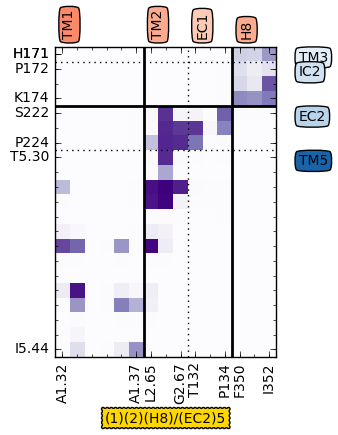

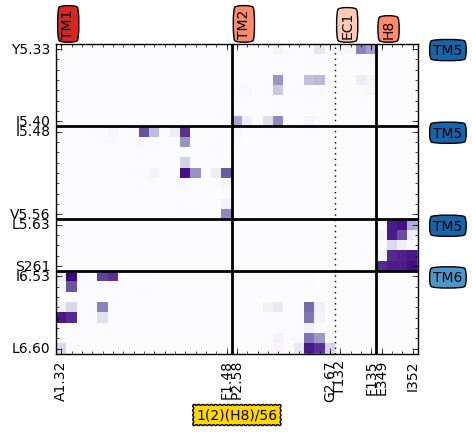

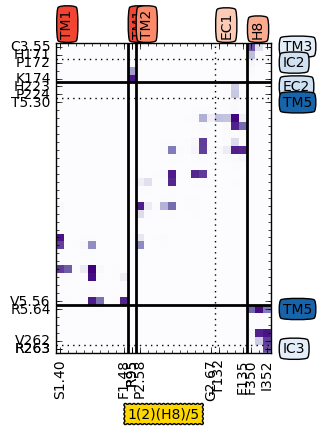

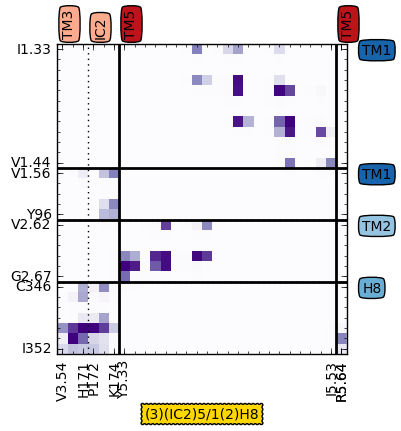

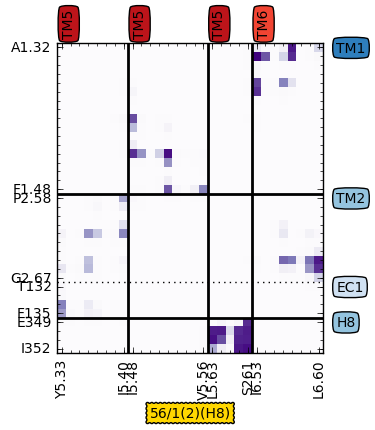

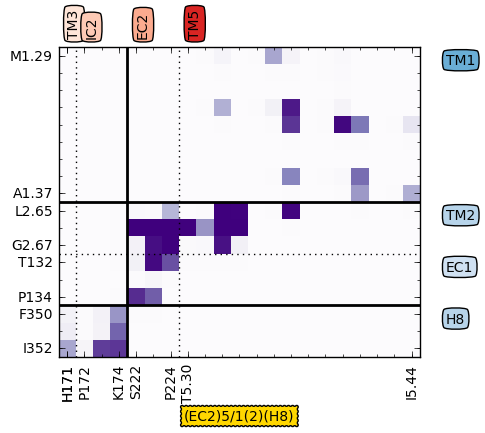

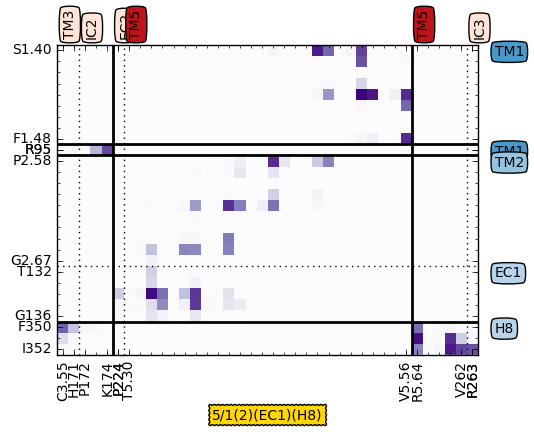

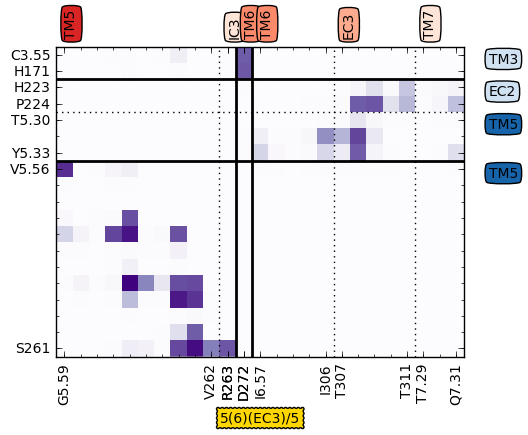

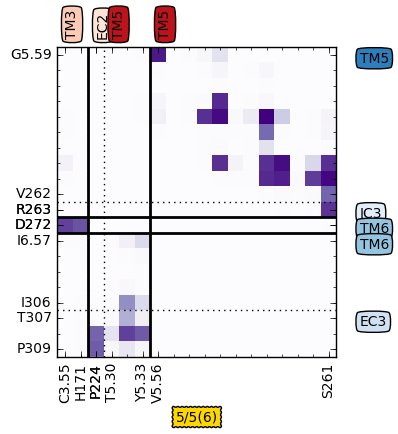

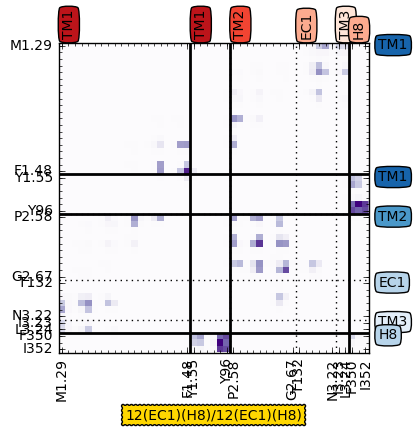

In [155]:
for i in range(10):
    pretty_plot_cmap(cmaps[i],verbose=False)